# Package Management

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.impute import SimpleImputer
import warnings
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



# Data Preprocessing

## Load Data

In [3]:

file_path = r"C:\Users\samma\PycharmProjects\jn_ta\data\train\cs-training.xlsx"
sheet_name = "cs-training"
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [4]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

## Data Types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [7]:
# check for missing values in the data
data.isnull().sum()


SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [8]:
# check the unique values in SeriousDlqin2yrs
data['SeriousDlqin2yrs'].unique()

array([1, 0], dtype=int64)

In [9]:
# count the frequency of each unique value in SeriousDlqin2yrs
data['SeriousDlqin2yrs'].value_counts()



SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

In [10]:
# calculate the percentage of each unique value in SeriousDlqin2yrs
data['SeriousDlqin2yrs'].value_counts() / data['SeriousDlqin2yrs'].count() * 100

SeriousDlqin2yrs
0    93.316
1     6.684
Name: count, dtype: float64

## Handling Missing Values

In [11]:
data.NumberOfDependents.agg(['mode'])

,mode
0,0.0


In [12]:
data['NumberOfDependents'].fillna(0, inplace=True)

In [13]:
data["MonthlyIncome"].agg(['mean', 'median', 'max', 'min'])

mean      6.670221e+03
median    5.400000e+03
max       3.008750e+06
min       0.000000e+00
Name: MonthlyIncome, dtype: float64

In [14]:
data['MonthlyIncome'].fillna(data['MonthlyIncome'].mean(), inplace=True)

In [15]:
data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [16]:
# Check for duplicates
duplicates = data.duplicated()
print("Number of duplicate rows = ", duplicates.sum())

Number of duplicate rows =  767


In [17]:
# Drop duplicates
data.drop_duplicates(inplace=True)

In [18]:
data.shape

(149233, 11)

# Exploratory Data Analysis


## Data Description

In [19]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149233.000000,149233.000000,149233.000000,149233.000000,149233.000000,1.492330e+05,149233.000000,149233.000000,149233.000000,149233.000000,149233.000000
mean,0.067036,6.077045,52.298145,0.388386,354.808254,6.674148e+03,8.488082,0.232435,1.023473,0.206811,0.741177
std,0.250085,250.396053,14.714050,3.779712,2042.891693,1.291259e+04,5.134233,3.752133,1.130304,3.736132,1.108596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030210,41.000000,0.000000,0.178098,3.900000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154285,52.000000,0.000000,0.368578,6.563000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.555959,63.000000,0.000000,0.877090,7.409000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [20]:
data.age.value_counts()

age
49     3833
48     3799
50     3746
47     3718
46     3709
       ... 
102       3
109       2
107       1
105       1
0         1
Name: count, Length: 86, dtype: int64

In [21]:
(data.age > 70).sum()

17424

In [22]:
(data.age < 18).sum()

1

In [23]:
data = data[data['age'] >= 18]

In [24]:
bins = [18, 30, 50, 70, float('inf')]
labels = ['18-29', '30-49', '50-69', '70 and above']

data['age_bin'] = pd.cut(data['age'], bins=bins, labels=labels)

age_bin_mapping = {'18-29': 1, '30-49': 2, '50-69': 3, '70 and above': 4}

data['age_bin_encoded'] = data['age_bin'].map(age_bin_mapping)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_bin,age_bin_encoded
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,30-49,2
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,30-49,2
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,30-49,2
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,18-29,1
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,30-49,2


In [25]:
# Assuming 'data' is your DataFrame and 'age_bin_encoded' is the column of interest
data['age_bin_encoded'] = data['age_bin_encoded'].astype('int')

In [26]:
data['age_bin_encoded'].isnull().sum()

0

In [27]:
data.NumberOfDependents.value_counts()

NumberOfDependents
0.0     90062
1.0     26314
2.0     19520
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64

In [28]:
bins = [-1, 0, 2, 4, 6, float('inf')]
labels = ['0', '1-2', '3-4', '5-6', '7 and above']

# Create bins
data['Dependents_bin'] = pd.cut(data['NumberOfDependents'], bins=bins, labels=labels)

# Initialize LabelEncoder
le = LabelEncoder()

# Transform labels into numerical labels
data['Dependents_bin_encoded'] = le.fit_transform(data['Dependents_bin'])

# Convert from category to int
data['Dependents_bin_encoded'] = data['Dependents_bin_encoded'].astype('int')

In [29]:
data.Dependents_bin_encoded.head()

0    1
1    1
2    0
3    0
4    0
Name: Dependents_bin_encoded, dtype: int32

In [30]:
data.RevolvingUtilizationOfUnsecuredLines.describe()

count    149232.000000
mean          6.077079
std         250.396892
min           0.000000
25%           0.030207
50%           0.154279
75%           0.555956
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [31]:
data['RevolvingUtilizationOfUnsecuredLines'].quantile([.99])

0.99    1.093977
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [32]:
(data[data['RevolvingUtilizationOfUnsecuredLines'] > 10]).describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_bin_encoded,Dependents_bin_encoded
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.070539,3564.023932,50.630705,0.186722,571.918644,7960.506407,5.763485,0.074689,1.186722,0.087137,0.651452,2.510373,0.435685
std,0.256587,5123.802683,14.565389,0.579502,1772.948412,5615.703328,3.114160,0.579711,1.065750,0.559651,1.022093,0.753393,0.643082
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,941.000000,39.000000,0.000000,0.217813,5450.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,2012.000000,48.000000,0.000000,0.402560,6670.221237,5.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
75%,0.000000,4116.000000,62.000000,0.000000,59.000000,8607.000000,7.000000,0.000000,2.000000,0.000000,1.000000,3.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000,4.000000,2.000000


In [33]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Filter the data to remove outliers
    filtered_df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

    return filtered_df


## Data Visualization

## Univariate Analysis

### Age Distribution

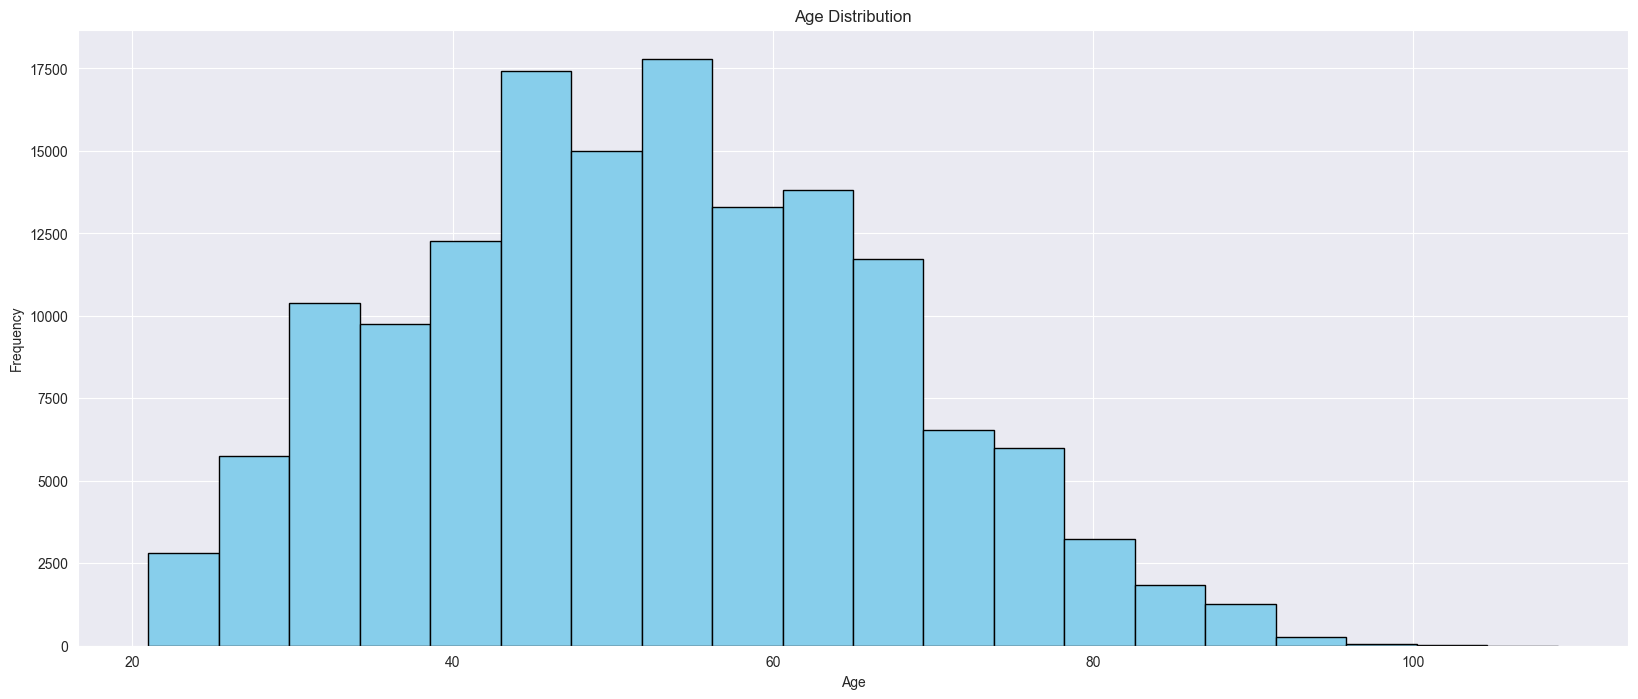

In [34]:

# Create a new figure
plt.figure(figsize=(20,8))

# Plot histogram of 'age'
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()


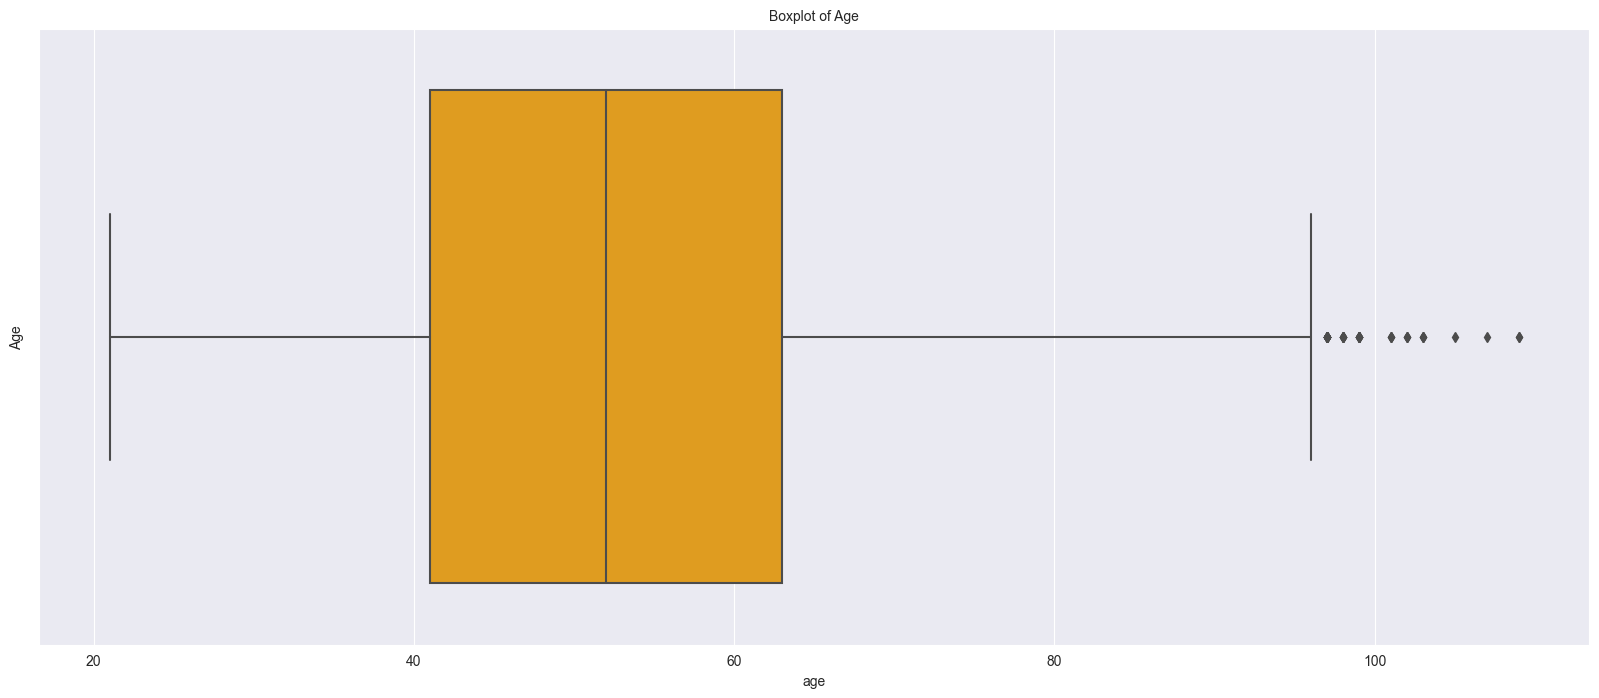

In [35]:
# Create a boxplot for 'age'
plt.figure(figsize=(20,8))
sns.boxplot(x=data['age'], orient='h', color='orange')
plt.ylabel('Age', fontsize=10)
plt.title('Boxplot of Age', fontsize=10)
plt.show()


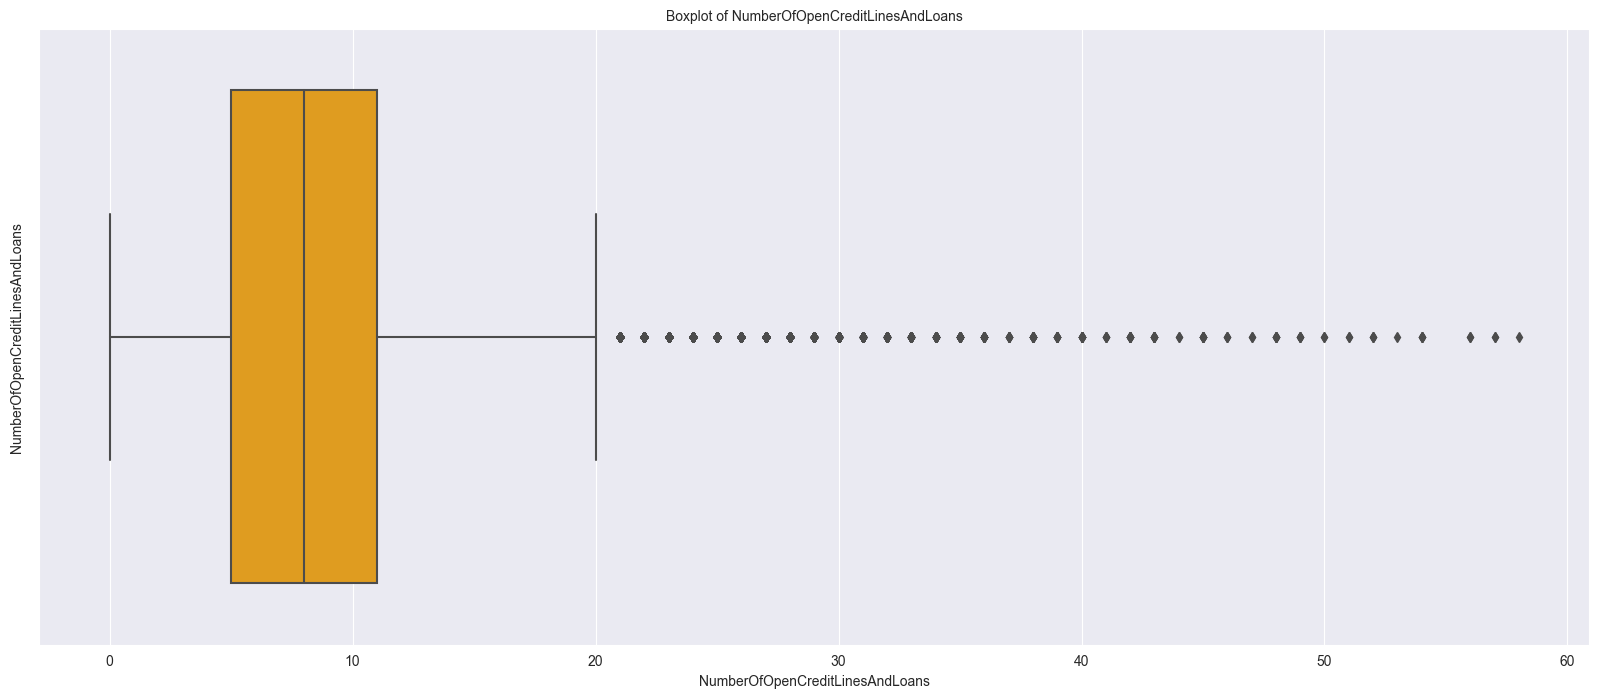

In [36]:
# Create a boxplot for 'age'
plt.figure(figsize=(20,8))
sns.boxplot(x=data['NumberOfOpenCreditLinesAndLoans'], orient='h', color='orange')
plt.ylabel('NumberOfOpenCreditLinesAndLoans', fontsize=10)
plt.title('Boxplot of NumberOfOpenCreditLinesAndLoans', fontsize=10)
plt.show()

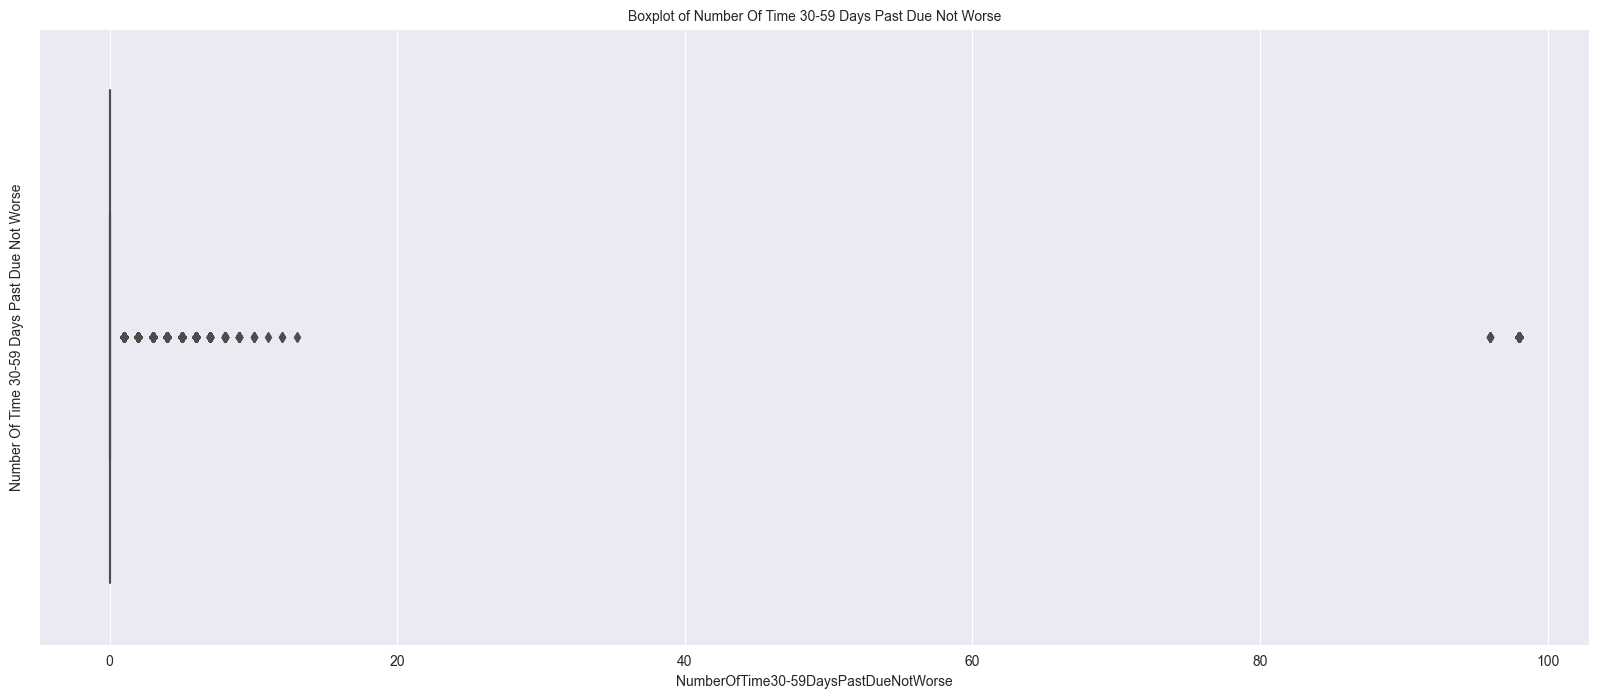

In [37]:
# Create a boxplot for 'age'
plt.figure(figsize=(20,8))
sns.boxplot(x=data['NumberOfTime30-59DaysPastDueNotWorse'], orient='h', color='orange', showfliers=True)
plt.ylabel('Number Of Time 30-59 Days Past Due Not Worse', fontsize=10)
plt.title('Boxplot of Number Of Time 30-59 Days Past Due Not Worse', fontsize=10)
plt.show()

### Number of Open Credit lines and Loans Distribution

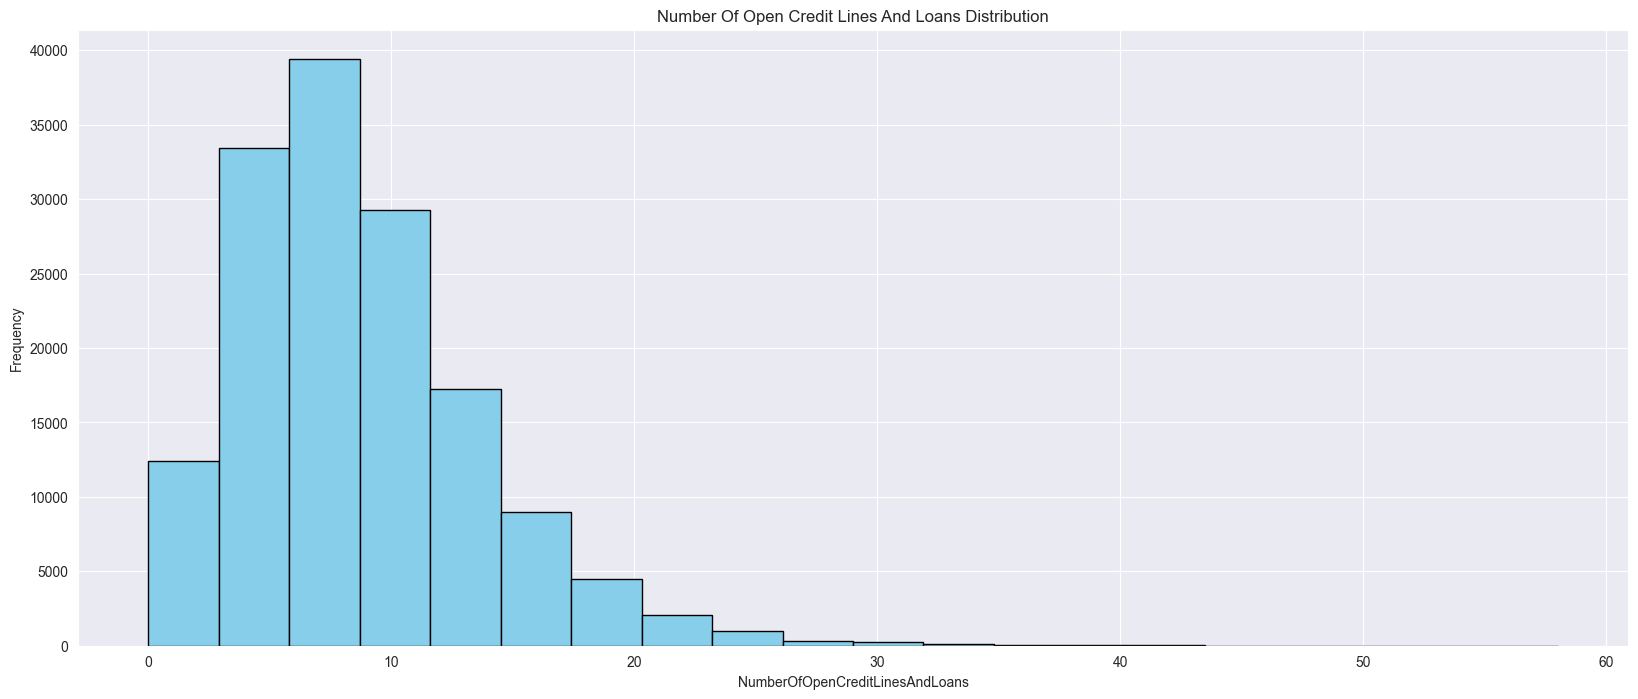

In [38]:

# Create a new figure
plt.figure(figsize=(20,8))

# Plot histogram of 'age'
plt.hist(data['NumberOfOpenCreditLinesAndLoans'], bins=20, color='skyblue', edgecolor='black')
plt.title('Number Of Open Credit Lines And Loans Distribution')
plt.xlabel('NumberOfOpenCreditLinesAndLoans')
plt.ylabel('Frequency')

# Show the plot
plt.show()


### Number of Dependents Distribution

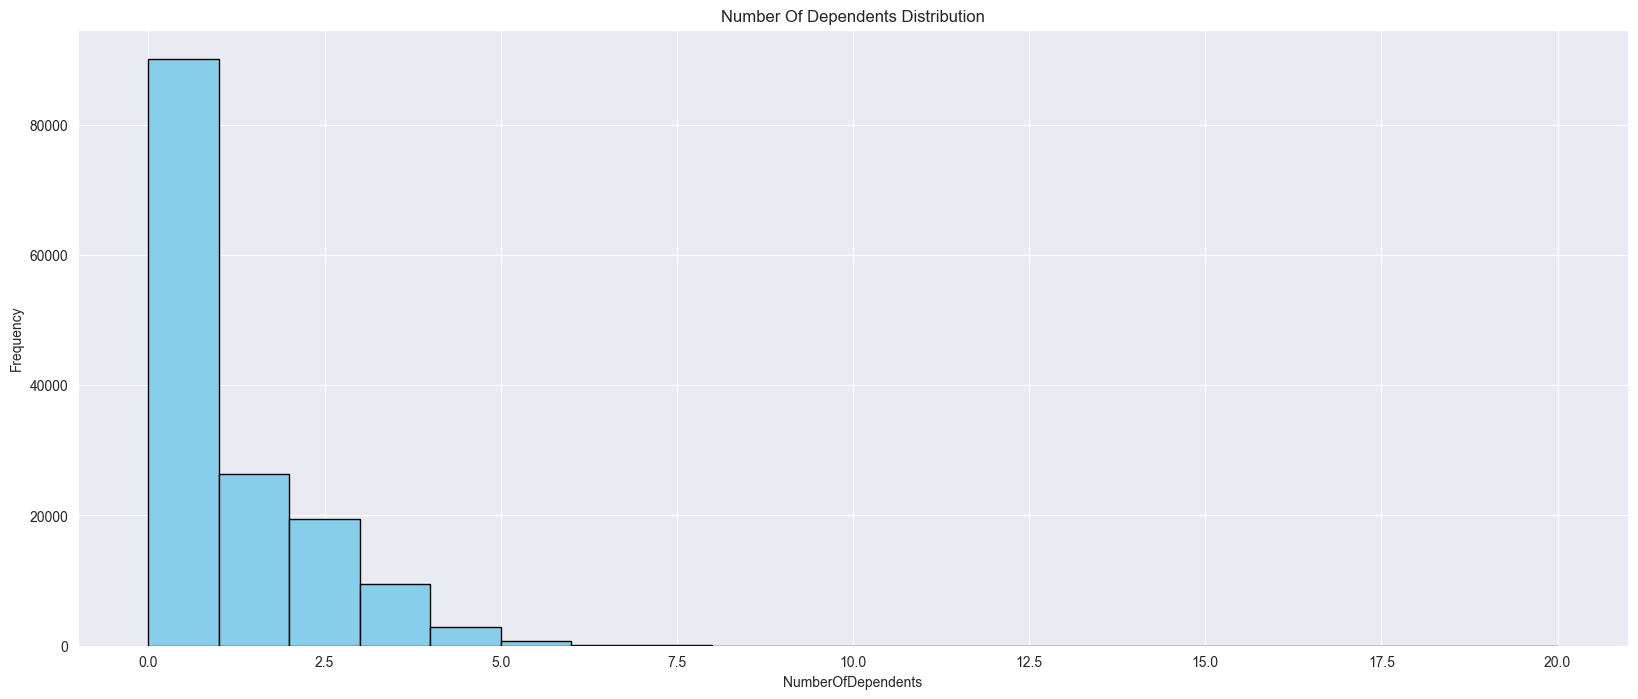

In [39]:

# Create a new figure
plt.figure(figsize=(20,8))

# Plot histogram of 'age'
plt.hist(data['NumberOfDependents'], bins=20, color='skyblue', edgecolor='black')
plt.title('Number Of Dependents Distribution')
plt.xlabel('NumberOfDependents')
plt.ylabel('Frequency')

# Show the plot
plt.show()


### Count of Serious Delinquency in 2 years

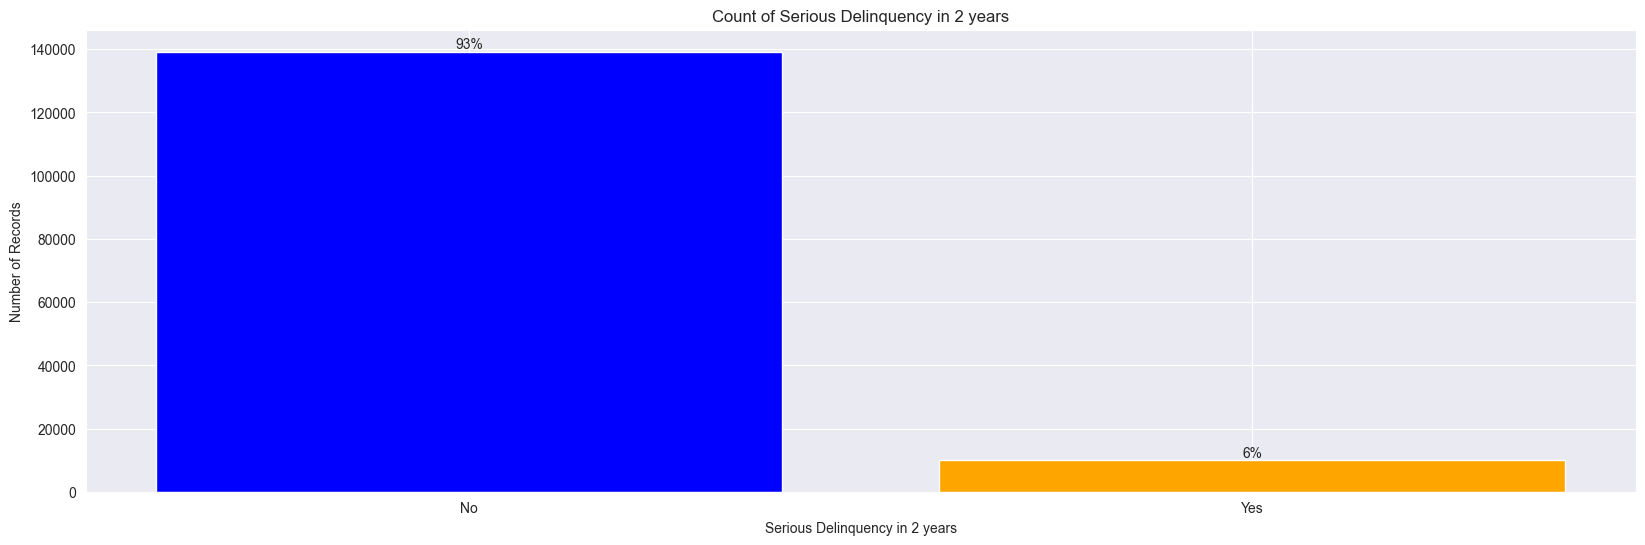

In [40]:

# Count the unique values in the 'SeriousDlqin2yrs' column
counts = data['SeriousDlqin2yrs'].value_counts()

# Calculate the percentage for each unique value
percentage = counts / data['SeriousDlqin2yrs'].count() * 100

# Plot the counts as a bar graph
plt.figure(figsize=(20,6))
bars = plt.bar(counts.index, counts.values, color=['blue', 'orange'])
plt.xlabel('Serious Delinquency in 2 years')
plt.ylabel('Number of Records')
plt.title('Count of Serious Delinquency in 2 years')
plt.xticks(counts.index, ['No', 'Yes'])

# Add the percentage on top of each bar
for i in range(len(bars)):
    yvalue = bars[i].get_height()
    plt.text(bars[i].get_x() + bars[i].get_width()/2, yvalue, '%d%%' % percentage[i], ha='center', va='bottom')

plt.show()


## Multivariate Analysis

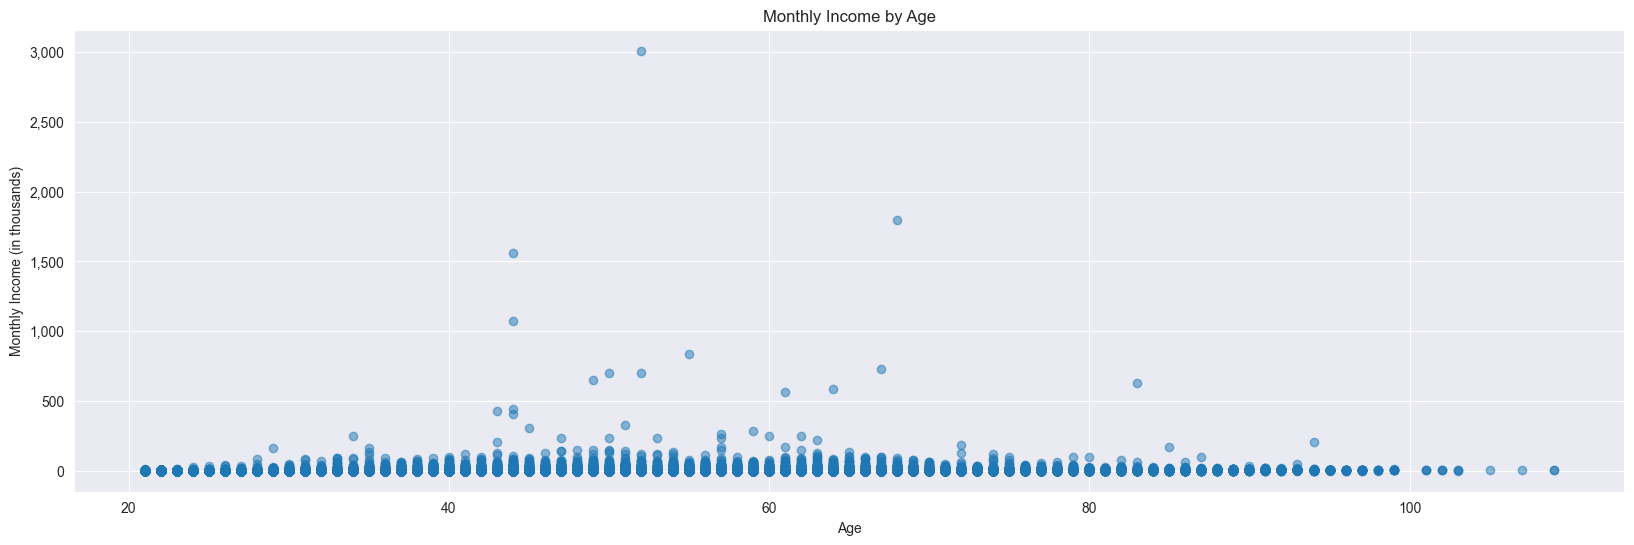

In [41]:
# Scatterplot of 'MonthlyIncome' and 'age'
plt.figure(figsize=(20,6))
plt.scatter(data['age'], data['MonthlyIncome']/1000, alpha=0.5)  # Divide by 1000 to represent income in thousands
plt.xlabel('Age')
plt.ylabel('Monthly Income (in thousands)')
plt.title('Monthly Income by Age')

# Format y-axis to display in thousands
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

### Monthly Income by Serious Delinquency in 2 years

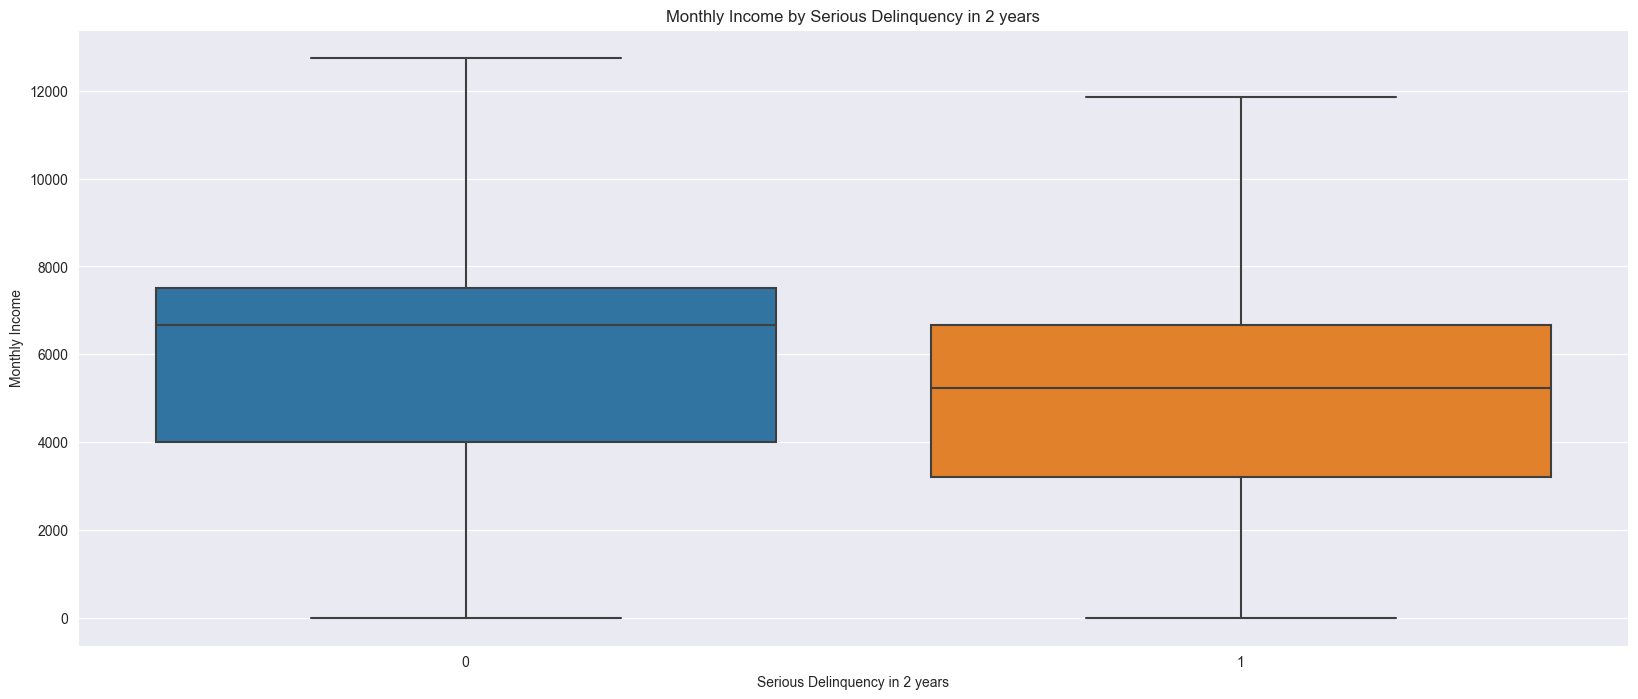

In [42]:
# Create a Grouped  boxplot
plt.figure(figsize=(20,8))
sns.boxplot(x='SeriousDlqin2yrs', y='MonthlyIncome', data=data, showfliers=False)

plt.xlabel('Serious Delinquency in 2 years')
plt.ylabel('Monthly Income')
plt.title('Monthly Income by Serious Delinquency in 2 years')
plt.show()

### Age by Serious Delinquency in 2 years

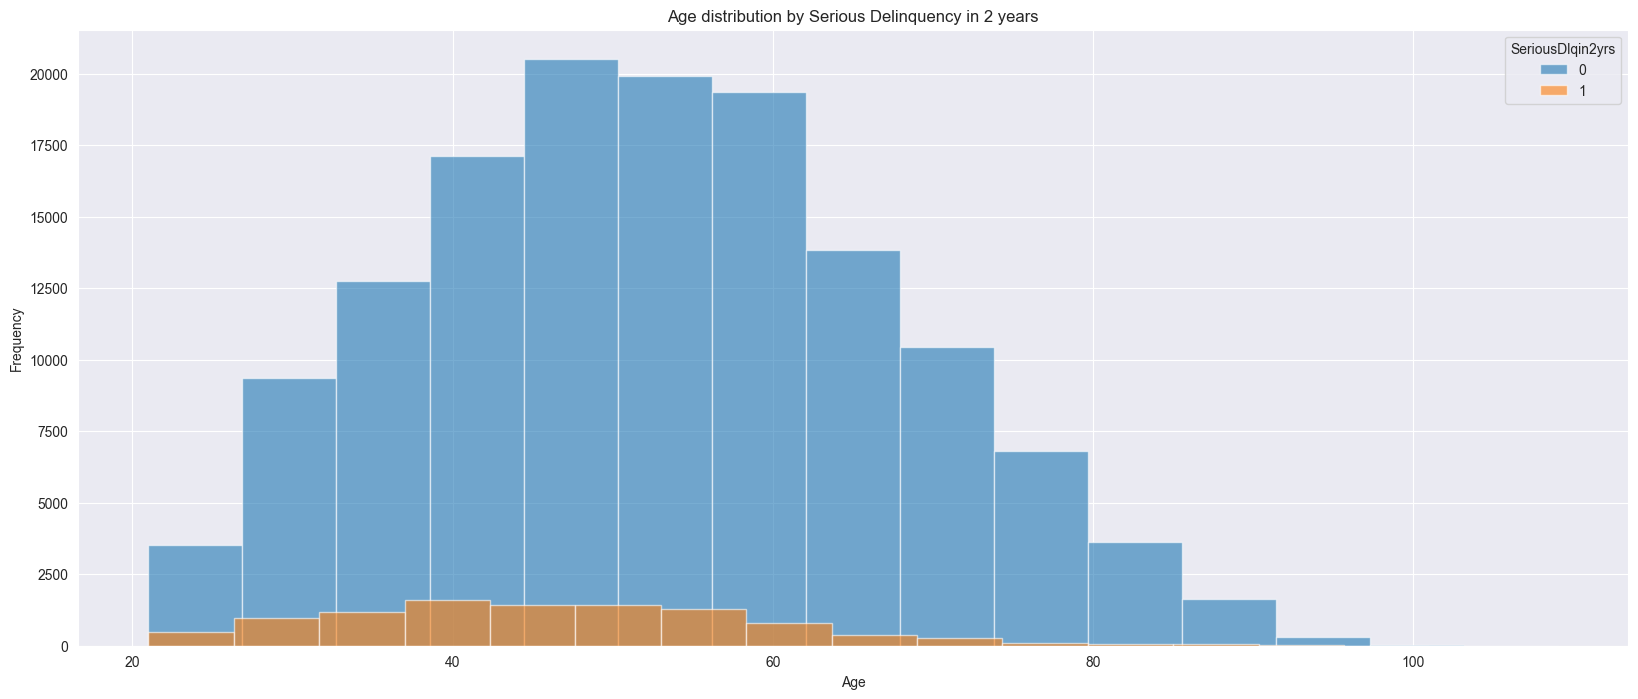

In [43]:
fig, ax = plt.subplots(figsize=(20,8))

for label, group in data.groupby('SeriousDlqin2yrs'):
    group['age'].hist(alpha=0.6, ax=ax, label=label, bins=15)

ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Age distribution by Serious Delinquency in 2 years')
plt.legend(title='SeriousDlqin2yrs')
plt.show()

### Correlation Matrix

In [44]:
# corr_matrix = data.corr()
# corr_matrix.round(2)

In [45]:
# plt.figure(figsize=(20,8))  # Size of the figure
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', )  # Heatmap
#
# plt.show()

# Model Building


In [46]:
model = XGBClassifier(tree_method = 'exact')


In [49]:
X = data.drop(['SeriousDlqin2yrs','age','age_bin','NumberOfDependents','Dependents_bin'],axis=1)
y = data['SeriousDlqin2yrs']

In [50]:
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = XGBClassifier(tree_method = 'exact', use_label_encoder=False, eval_metric='logloss')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Print the accuracy of the model
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

# Print the classification report
print("Classification Report: \n", classification_report(y_test, y_pred))


Accuracy:  0.9364976546794729
Confusion Matrix: 
 [[41316   483]
 [ 2360   611]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     41799
           1       0.56      0.21      0.30      2971

    accuracy                           0.94     44770
   macro avg       0.75      0.60      0.63     44770
weighted avg       0.92      0.94      0.92     44770



In [51]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Print the accuracy of the model
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

# Print the classification report
print("Classification Report: \n", classification_report(y_test, y_pred))


Accuracy:  0.9358052267143177
Confusion Matrix: 
 [[41317   482]
 [ 2392   579]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     41799
           1       0.55      0.19      0.29      2971

    accuracy                           0.94     44770
   macro avg       0.75      0.59      0.63     44770
weighted avg       0.92      0.94      0.92     44770

